<a href="https://colab.research.google.com/github/NarendarB0152/DataScience/blob/main/DL/RNNLSTMGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data=["I love coding","I like reading","I love sleeping","I enjoy playing"]

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data)
sequences=tokenizer.texts_to_sequences(data)

In [ ]:
sequences=pad_sequences(sequences,maxlen=3,padding="pre")
X,y=sequences[:,:-1],sequences[:,-1]

In [ ]:
y=to_categorical(y,num_classes=len(tokenizer.word_index)+1)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=10, input_length=2))
model.add(SimpleRNN(32))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
test_text = "I love"
test_seq = tokenizer.texts_to_sequences([test_text])
test_seq = pad_sequences(test_seq, maxlen=2, padding='pre')
pred = model.predict(test_seq)
pred_word = tokenizer.index_word[np.argmax(pred)]

print("Next word after 'I love':", pred_word)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Next word after 'I love': sleeping


# LSTM

In [22]:
# LSTM for Sentiment Analysis
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample data
reviews = ["The movie was excellent",
           "The movie was boring",
           "The film was interesting",
           "The film was dull"]
labels = np.array([1, 0, 1, 0])  # 1=Positive, 0=Negative

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Padding sequences
X = pad_sequences(sequences, maxlen=5, padding='post')

# Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=10, input_length=5))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, labels, epochs=200, verbose=0)

# Test prediction
test_review = "The film was some what good and boring in middle"
test_seq = tokenizer.texts_to_sequences([test_review])
test_seq = pad_sequences(test_seq, maxlen=5, padding='post')
pred = model.predict(test_seq)

print(f"Review '{test_review}' Sentiment:", "Positive" if pred > 0.5 else "Negative")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Review 'The film was some what good and boring in middle' Sentiment: Negative


# GRU (Gated Recurrent Unit)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Predicted stock price for next day: 145.3236


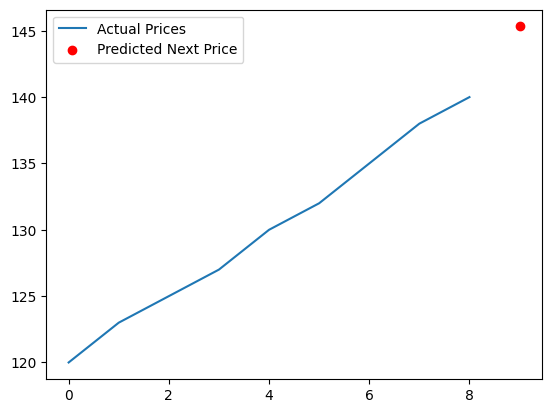

In [23]:
# GRU for Stock Price Prediction
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Simulated stock prices (simple example)
prices = np.array([120, 123, 125, 127, 130, 132, 135, 138, 140])

# Prepare data (sequence of 3 days predicts the next day)
X, y = [], []
for i in range(len(prices)-3):
    X.append(prices[i:i+3])
    y.append(prices[i+3])

X, y = np.array(X), np.array(y)

# Reshape input to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(3,1)))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=200, verbose=0)

# Predict next day price
test_input = np.array([138, 140, 142]).reshape((1,3,1))
predicted_price = model.predict(test_input)

print("Predicted stock price for next day:", predicted_price.flatten()[0])

# Visualization
plt.plot(range(len(prices)), prices, label='Actual Prices')
plt.scatter(len(prices), predicted_price, color='red', label='Predicted Next Price')
plt.legend()
plt.show()
